In [50]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('./tv_cleaned_v2.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data.head()

,brand,tv_type,resolution,resolution_type,x_resolution,y_resolution,screen_size,processor_core,processor_ram,processor_inbuilt_storage,...,hd,has_wifi,has_ethernet,is_smart,is_ultra_slim,viewing_angle,num_hdmi_ports,num_usb_ports,rating,price
0,acer,qled,NaN,missing,1366.0,768.0,32.0,4.0,1.5,16.0,...,HD,1.0,1.0,1.0,1.0,178.0,2.0,2.0,53.0,14999.0
1,xiaomi,led,Full HD,missing,1920.0,1080.0,43.0,NaN,1.0,8.0,...,Full HD,1.0,1.0,1.0,0.0,178.0,2.0,2.0,53.0,9999.0
2,lg,led,4K Resolution,4K Resolution,3840.0,2160.0,43.0,NaN,NaN,NaN,...,Ultra HD,1.0,1.0,1.0,NaN,NaN,3.0,2.0,65.0,31990.0
3,samsung,led,4K Resolution,4K Resolution,3840.0,2160.0,43.0,NaN,NaN,NaN,...,Ultra HD,1.0,1.0,1.0,0.0,178.0,2.0,1.0,63.0,38900.0
4,lg,led,NaN,missing,1366.0,768.0,32.0,NaN,NaN,NaN,...,HD,1.0,1.0,1.0,0.0,178.0,3.0,2.0,48.0,16249.0


In [32]:
data.duplicated().sum()

115

In [33]:
data.drop_duplicates(inplace=True)

1. UNIVARIATE ANALYSIS

# brand

In [55]:
brand_val_counts = data['brand'].value_counts()
brands_to_map = brand_val_counts[brand_val_counts<11].index.tolist()
data['brand2'] = data['brand'].apply(lambda x: 'others' if x in brands_to_map else x)

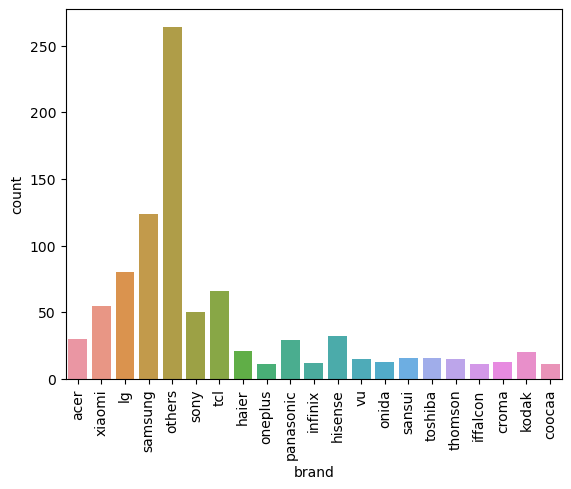

In [56]:
sns.countplot(data['brand'])
plt.xticks(rotation='vertical')
plt.show()

- apart from 'others', most of the phones in our data belong ot samsung, lg and tcl.

In [18]:
data['brand2'].value_counts()

others       272
samsung      135
lg            85
tcl           66
xiaomi        58
sony          54
hisense       33
acer          31
panasonic     31
haier         24
kodak         21
sansui        18
vu            17
thomson       17
toshiba       16
infinix       15
croma         14
onida         13
iffalcon      12
oneplus       12
coocaa        11
Name: brand2, dtype: int64

In [19]:
data.drop(columns='brand', inplace=True)

In [20]:
data.rename(columns={'brand2':'brand'}, inplace=True)

- There were around 50 categorie in brand column 
- to reduce cardinality, the brand which had <11 TVs in the data is included in the others column

In [34]:
data['brand'].isna().sum()

1

The row where brand is NaN has all the column values as NaN , so dropping that row

In [36]:
data[data['brand'].isna()]
data.drop(index=30, inplace=True)

 # resolution

In [38]:
data['resolution'].unique()

array([nan, 'Full HD', '4K Resolution', '8K Resolution', 'HD Ready'],
      dtype=object)

In [41]:
data['resolution'].value_counts()

4K Resolution    588
Full HD          116
8K Resolution     13
HD Ready           2
Name: resolution, dtype: int64

In [58]:
data['resolution'].isna().sum()

185

- There are 185 null values in resolution column

# x_resolution

In [59]:
data['x_resolution'].isna().sum()

1

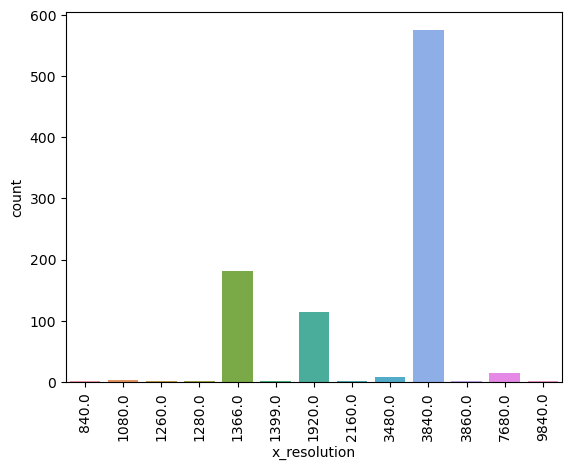

In [51]:
sns.countplot(data['x_resolution'])
plt.xticks(rotation='vertical')
plt.show()

In [60]:
data[data['x_resolution'].isna()]

,tv_type,resolution,resolution_type,x_resolution,y_resolution,screen_size,processor_core,processor_ram,processor_inbuilt_storage,num_speakers,...,has_ethernet,is_smart,is_ultra_slim,viewing_angle,num_hdmi_ports,num_usb_ports,rating,price,brand,brand2
59,NaN,NaN,missing,NaN,NaN,27.0,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,178.0,2.0,2.0,45.0,99999.0,lg,lg


# y_resolution

In [62]:
data['y_resolution'].isna().sum()

1

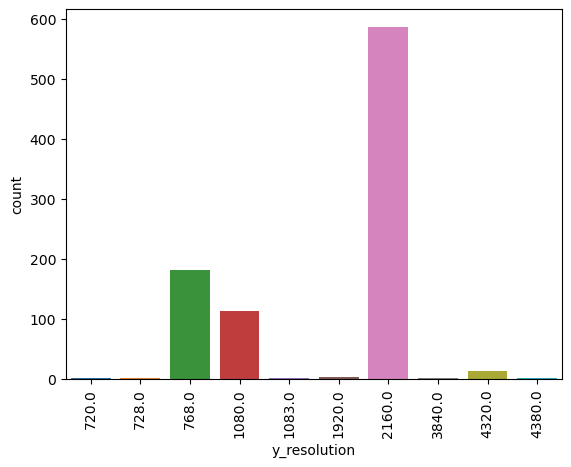

In [53]:
sns.countplot(data['y_resolution'])
plt.xticks(rotation='vertical')
plt.show()

In [63]:
data[data['y_resolution'].isna()]

,tv_type,resolution,resolution_type,x_resolution,y_resolution,screen_size,processor_core,processor_ram,processor_inbuilt_storage,num_speakers,...,has_ethernet,is_smart,is_ultra_slim,viewing_angle,num_hdmi_ports,num_usb_ports,rating,price,brand,brand2
59,NaN,NaN,missing,NaN,NaN,27.0,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,178.0,2.0,2.0,45.0,99999.0,lg,lg


In [64]:
data.columns 

Index(['tv_type', 'resolution', 'resolution_type', 'x_resolution',
       'y_resolution', 'screen_size', 'processor_core', 'processor_ram',
       'processor_inbuilt_storage', 'num_speakers', 'speaker_output', 'hd',
       'has_wifi', 'has_ethernet', 'is_smart', 'is_ultra_slim',
       'viewing_angle', 'num_hdmi_ports', 'num_usb_ports', 'rating', 'price',
       'brand', 'brand2'],
      dtype='object')

In [68]:
data = (data[['brand','tv_type', 'resolution', 'resolution_type', 'x_resolution',
       'y_resolution', 'screen_size', 'processor_core', 'processor_ram',
       'processor_inbuilt_storage', 'num_speakers', 'speaker_output', 'hd',
       'has_wifi', 'has_ethernet', 'is_smart', 'is_ultra_slim',
       'viewing_angle', 'num_hdmi_ports', 'num_usb_ports', 'rating', 'price' ]])

In [67]:
data.drop(columns='brand2', inplace=True)

# screen_size

In [74]:
data['screen_size'].value_counts()

32.00     166
55.00     163
43.00     153
65.00     126
50.00      80
75.00      46
40.00      29
24.00      24
85.00      23
98.00      11
77.00      10
70.00       7
31.50       7
48.00       5
42.00       5
83.00       5
54.72       5
97.00       3
42.91       3
100.00      3
74.41       3
49.61       3
58.00       3
86.00       3
60.00       2
90.00       2
89.00       2
64.57       1
23.62       1
39.37       1
23.00       1
88.00       1
110.00      1
55.12       1
120.00      1
27.00       1
82.00       1
292.00      1
57.48       1
Name: screen_size, dtype: int64

In [75]:
data['screen_size'].isna().sum()

0

# processor_core

In [76]:
data['screen_size'].value_counts()

32.00     166
55.00     163
43.00     153
65.00     126
50.00      80
75.00      46
40.00      29
24.00      24
85.00      23
98.00      11
77.00      10
70.00       7
31.50       7
48.00       5
42.00       5
83.00       5
54.72       5
97.00       3
42.91       3
100.00      3
74.41       3
49.61       3
58.00       3
86.00       3
60.00       2
90.00       2
89.00       2
64.57       1
23.62       1
39.37       1
23.00       1
88.00       1
110.00      1
55.12       1
120.00      1
27.00       1
82.00       1
292.00      1
57.48       1
Name: screen_size, dtype: int64

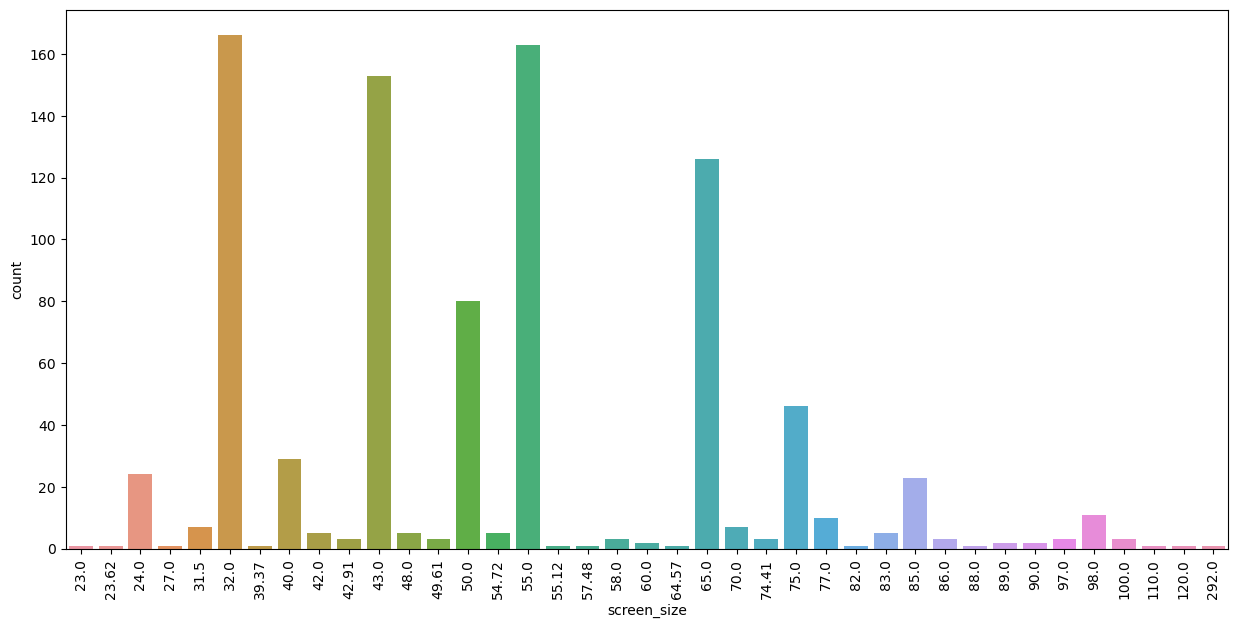

In [79]:
plt.figure(figsize=(15,7))
sns.countplot(data['screen_size'])
plt.xticks(rotation='vertical')
plt.show()

- top 3 most frequently occuring screen sizes are 32, 55 and 43 inches
- there is also TVs with screen sizes >100

In [80]:
data[data['screen_size']>100]

,brand,tv_type,resolution,resolution_type,x_resolution,y_resolution,screen_size,processor_core,processor_ram,processor_inbuilt_storage,...,hd,has_wifi,has_ethernet,is_smart,is_ultra_slim,viewing_angle,num_hdmi_ports,num_usb_ports,rating,price
23,samsung,micro led,8K Resolution,8K Resolution,7680.0,4320.0,292.0,NaN,NaN,NaN,...,Ultra HD,1.0,0.0,1.0,1.0,178.0,NaN,NaN,79.0,8800000.0
75,samsung,micro led,4K Resolution,4K Resolution,3840.0,2160.0,110.0,NaN,NaN,NaN,...,Ultra HD,1.0,0.0,1.0,NaN,NaN,6.0,3.0,88.0,11499000.0
503,hisense,laser,4K Resolution,4K Resolution,3840.0,2160.0,120.0,NaN,NaN,NaN,...,Ultra HD,1.0,1.0,1.0,NaN,NaN,3.0,2.0,73.0,499999.0


In [81]:
original = pd.read_csv('./tv_original.csv')
original.head()

,Unnamed: 0,name,price,rating,screen_size,display,wifi,smart,speakers,processor,view,ports
0,0,Acer V Series 32 inch HD Ready Smart QLED TV (...,"â‚¹14,999",53,"32â€‰in, QLED TV",1366â€‰xâ€‰768â€‰pixels,"Wifi, Ethernet",Smart TV,"2 Speakers, 30â€‰W Output","Quad Core Processor, 1.5 GB RAM, 16 GB Storage","Ultra Slim, 178â€‰Â° Viewing Angle","2 HDMI Ports, 2 USB Ports"
1,1,Xiaomi EA43 43 inch Full HD Smart LED TV (L43M...,"â‚¹9,999",53,"43â€‰in, LED TV","Full HD, 1920â€‰xâ€‰1080â€‰pixels","Wifi, Ethernet",Smart TV,"2 Speakers, 16â€‰W Output","Cortex A53 Processor, 1 GB RAM, 8 GB Storage",178â€‰Â° Viewing Angle,"2 HDMI Ports, 2 USB Ports"
2,2,LG UR75 43 inch Ultra HD 4K Smart LED TV (43UR...,"â‚¹31,990",65,"43â€‰in, LED TV","4K Resolution, 3840â€‰xâ€‰2160â€‰pixels","Wifi, Ethernet",Smart TV,"2 Speakers, 20â€‰W Output","3 HDMI Ports, 2 USB Ports",Supports Apps & Games,Screen Mirroring / Miracast Support
3,3,Samsung CU7700 43 inch Ultra HD 4K Smart LED T...,"â‚¹38,900",63,"43â€‰in, LED TV","4K Resolution, 3840â€‰xâ€‰2160â€‰pixels","Wifi, Ethernet",Smart TV,"2 Speakers, 20â€‰W Output",178â€‰Â° Viewing Angle,"2 HDMI Ports, 1 USB Ports",Supports Apps & Games
4,4,LG LQ64 32 inch HD Ready Smart LED TV (32LQ640...,"â‚¹16,249",48,"32â€‰in, LED TV",1366â€‰xâ€‰768â€‰pixels,"Wifi, Ethernet",Smart TV,"2 Speakers, 16â€‰W Output",178â€‰Â° Viewing Angle,"3 HDMI Ports, 2 USB Ports",Screen Mirroring / Miracast Support


In [89]:
original['price'] = original['price'].str.replace('â‚¹1','').str.replace('â‚¹','').str.replace(',','').astype(int)

In [92]:
pd.set_option('display.max_colwidth',None)

In [96]:
original[original['price']>5000000][['name','price']]

,name,price
23,Samsung The Wall Luxury 292-inch Ultra HD 8K Smart MicroLED TV,8800000
131,Samsung QA98Q900RBK 98-inch Ultra HD 8K Smart QLED TV,5999900
187,Samsung QA98Q900RBK 98-inch Ultra HD 8K Smart QLED TV,5999900
221,Samsung QA98Q900RBK 98-inch Ultra HD 8K Smart QLED TV,5999900
430,Samsung MNA89MS1BACXKR 89 inch Ultra HD 4K Smart Mini-LED TV,8311799
623,Samsung Neo MS1 89 inch Ultra HD 4K Smart Micro LED TV,7599999


- tvs whose prices are more than 5000000 are obviously  outliers can skew our results so dropping them

In [98]:
idx_to_drop = data[data['price']>5000000].index
data.drop(index=idx_to_drop, inplace=True)

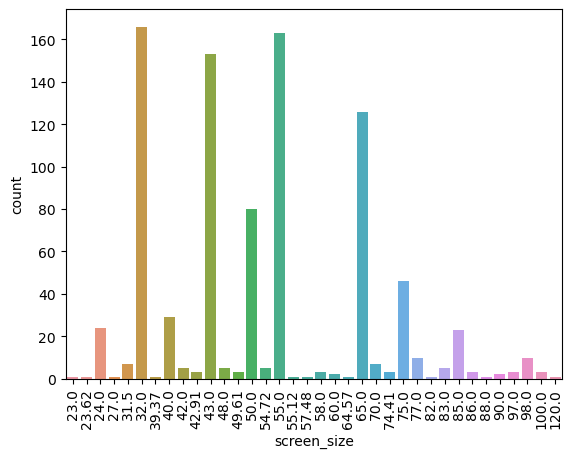

In [99]:
sns.countplot(data['screen_size'])
plt.xticks(rotation='vertical');

In [101]:
data['screen_size'].value_counts()

32.00     166
55.00     163
43.00     153
65.00     126
50.00      80
75.00      46
40.00      29
24.00      24
85.00      23
98.00      10
77.00      10
70.00       7
31.50       7
48.00       5
83.00       5
54.72       5
42.00       5
58.00       3
100.00      3
49.61       3
97.00       3
86.00       3
42.91       3
74.41       3
90.00       2
60.00       2
82.00       1
120.00      1
55.12       1
64.57       1
27.00       1
88.00       1
39.37       1
23.62       1
23.00       1
57.48       1
Name: screen_size, dtype: int64

In [102]:
data.columns

Index(['brand', 'tv_type', 'resolution', 'resolution_type', 'x_resolution',
       'y_resolution', 'screen_size', 'processor_core', 'processor_ram',
       'processor_inbuilt_storage', 'num_speakers', 'speaker_output', 'hd',
       'has_wifi', 'has_ethernet', 'is_smart', 'is_ultra_slim',
       'viewing_angle', 'num_hdmi_ports', 'num_usb_ports', 'rating', 'price'],
      dtype='object')

# processor core

In [107]:
data['processor_core'].isna().mean() * 100

84.98331479421579

- around 85% data in processor core is missing, drop it

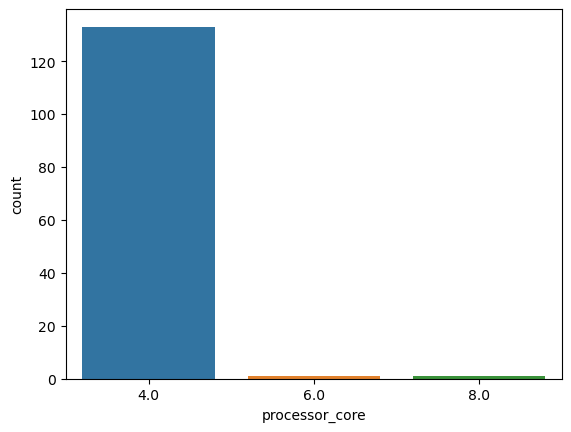

In [103]:
sns.countplot(data['processor_core'])
plt.show()

In [104]:
data['processor_core'].value_counts()

4.0    133
8.0      1
6.0      1
Name: processor_core, dtype: int64

# processor ram

In [108]:
data['processor_ram'].isna().mean() * 100

54.17130144605117

-- 55% data in processor ram is missing
- also, the end goal of the project is making a TV price predictor, we won't ask user to input processor RAM of TV, because it's not  a very important feature, so we can drop it

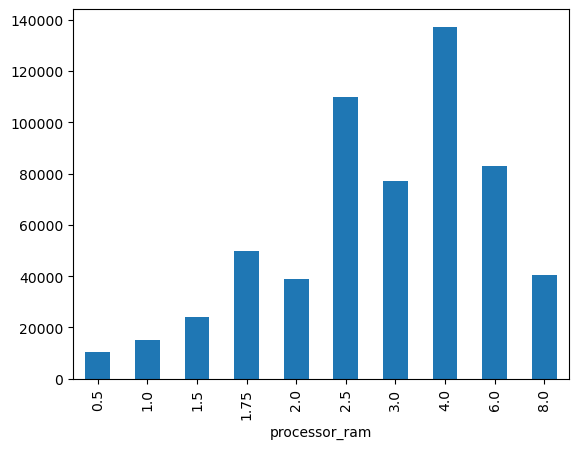

In [113]:
data.groupby('processor_ram')['price'].median().plot(kind='bar')
plt.show()

# processor inbuilt storage

In [115]:
data['processor_inbuilt_storage'].isna().mean()*100

53.83759733036707

- 54% data is missing in processor inbuilt storage

# num_Speakers

In [116]:
data['num_speakers'].isna().mean()*100

12.235817575083425

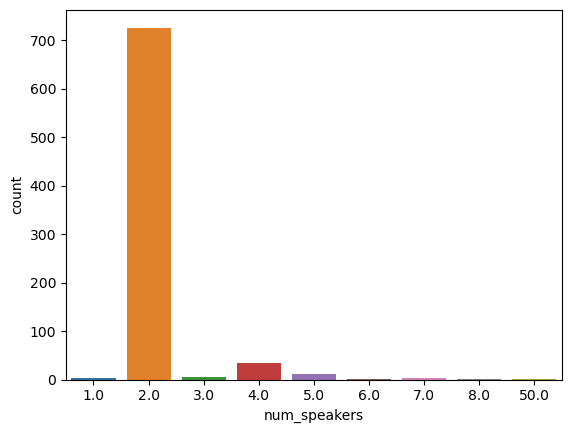

In [118]:
sns.countplot(data['num_speakers']);

In [119]:
data[data['num_speakers'] > 5]

,brand,tv_type,resolution,resolution_type,x_resolution,y_resolution,screen_size,processor_core,processor_ram,processor_inbuilt_storage,...,hd,has_wifi,has_ethernet,is_smart,is_ultra_slim,viewing_angle,num_hdmi_ports,num_usb_ports,rating,price
157,oneplus,qled,4K Resolution,4K Resolution,3840.0,2160.0,65.0,NaN,3.0,32.0,...,Ultra HD,1.0,1.0,1.0,1.0,178.0,3.0,2.0,84.0,99999.0
440,tcl,qd mini led,4K Resolution,4K Resolution,3840.0,2160.0,85.0,NaN,4.0,64.0,...,Ultra HD,1.0,0.0,1.0,0.0,NaN,NaN,NaN,62.0,194499.0
441,tcl,qd mini led,4K Resolution,4K Resolution,3840.0,2160.0,65.0,NaN,4.0,64.0,...,Ultra HD,1.0,0.0,1.0,0.0,NaN,NaN,NaN,60.0,102999.0
442,tcl,qd mini led,4K Resolution,4K Resolution,3840.0,2160.0,75.0,NaN,4.0,64.0,...,Ultra HD,1.0,0.0,1.0,0.0,NaN,NaN,NaN,61.0,137299.0
760,others,led,4K Resolution,4K Resolution,3840.0,2160.0,65.0,8.0,6.0,64.0,...,Ultra HD,1.0,1.0,1.0,0.0,178.0,3.0,2.0,86.0,75990.0
832,hisense,led,4K Resolution,4K Resolution,3840.0,2160.0,50.0,NaN,2.0,16.0,...,Ultra HD,1.0,1.0,1.0,0.0,178.0,3.0,2.0,73.0,34999.0
833,hisense,led,4K Resolution,4K Resolution,3840.0,2160.0,55.0,NaN,2.0,16.0,...,Ultra HD,1.0,1.0,1.0,0.0,178.0,3.0,2.0,74.0,37999.0
946,xiaomi,oled,4K Resolution,4K Resolution,3840.0,2160.0,55.0,4.0,3.0,32.0,...,Ultra HD,1.0,1.0,1.0,0.0,178.0,3.0,2.0,80.0,99999.0
947,samsung,qled,4K Resolution,4K Resolution,3840.0,2160.0,75.0,NaN,NaN,NaN,...,Ultra HD,1.0,1.0,1.0,0.0,178.0,4.0,2.0,83.0,389990.0


- 12.2% null values
- majority of the TVs have <5 speakers (with 2 speakers beign the most frequent category)

# speaker output

In [120]:
data['speaker_output'].isna().mean()*100

3.5595105672969964

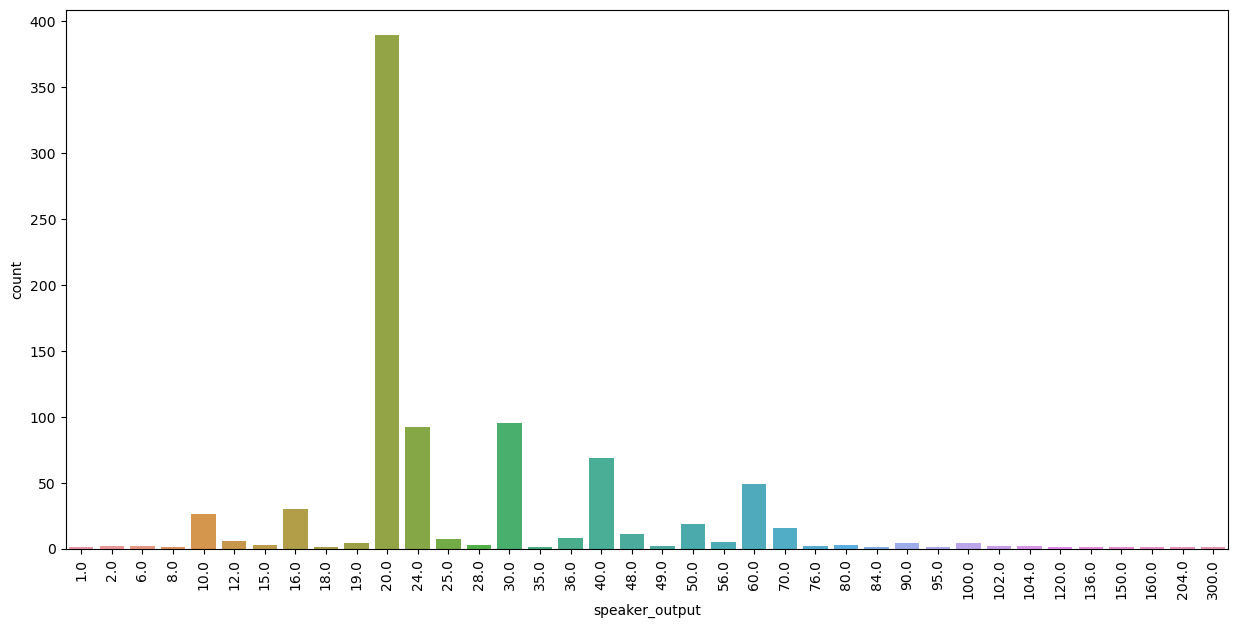

In [123]:
plt.figure(figsize=(15,7))
sns.countplot(data['speaker_output'])
plt.xticks(rotation='vertical')
plt.show()

- majority of the speakers have speaker output of 20W.
- speaker output > 60W is relatively rare
- 3.6% null values

# hd

In [125]:
data['hd'].isna().mean()*100

0.11123470522803114

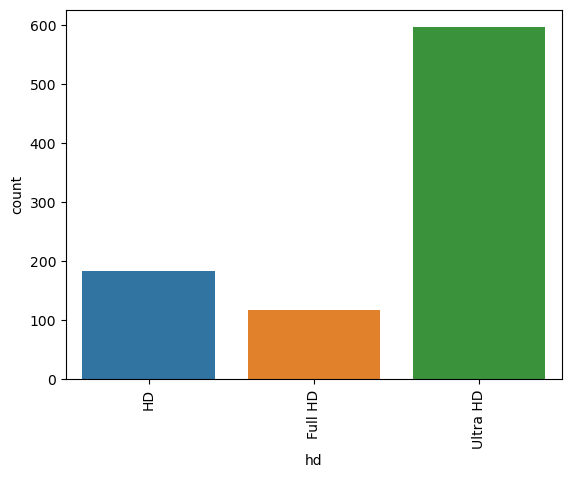

In [127]:
sns.countplot(data['hd'])
plt.xticks(rotation='vertical')
plt.show()

- 0.11% null values
- majority of the TVs are Ultra HD

# has wifi

In [132]:
data['has_wifi'].isna().mean()*100

3.337041156840934

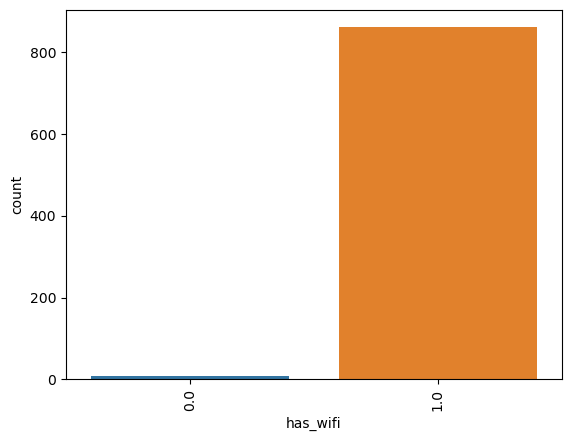

In [129]:
sns.countplot(data['has_wifi'])
plt.xticks(rotation='vertical')
plt.show()

In [131]:
data['has_wifi'].value_counts()/len(data)

1.0    0.956618
0.0    0.010011
Name: has_wifi, dtype: float64

- around 95.6% TVs have wifi
- 3.34% missing values

# has ethernet

In [133]:
data['has_ethernet'].isna().mean()*100

3.337041156840934

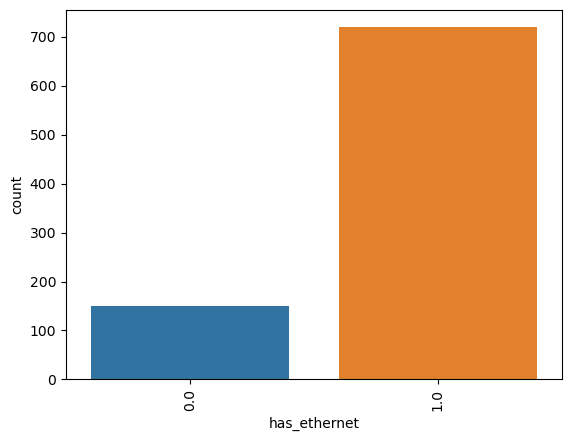

In [134]:
sns.countplot(data['has_ethernet'])
plt.xticks(rotation='vertical')
plt.show()

In [135]:
data['has_ethernet'].value_counts()/len(data)

1.0    0.799778
0.0    0.166852
Name: has_ethernet, dtype: float64

- around 80% TVs have ethernet
- 3.34% values are null

# is_smart

In [137]:
data['is_smart'].isna().mean()*100

0.0

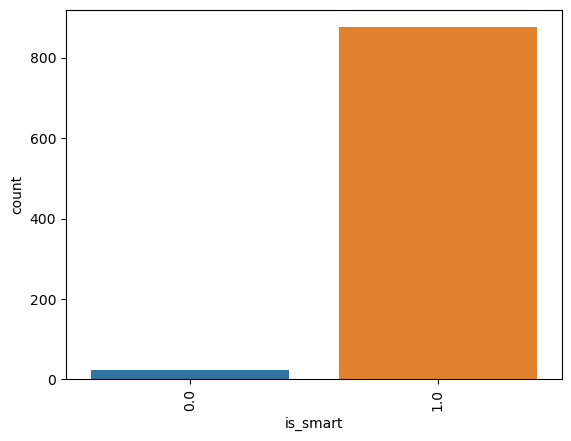

In [138]:
sns.countplot(data['is_smart'])
plt.xticks(rotation='vertical')
plt.show()

In [139]:
data['is_smart'].value_counts()/len(data)

1.0    0.973304
0.0    0.026696
Name: is_smart, dtype: float64

- no null values
- 97.3%^ TVs are smart

# ultra slim

In [142]:
data['is_ultra_slim'].isna().mean()*100

27.697441601779754

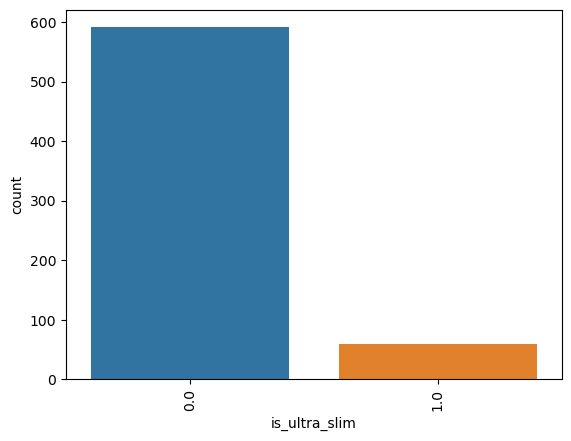

In [143]:
sns.countplot(data['is_ultra_slim'])
plt.xticks(rotation='vertical')
plt.show()

In [145]:
data['is_ultra_slim'].value_counts()/len(data)

0.0    0.657397
1.0    0.065628
Name: is_ultra_slim, dtype: float64

- 27.7% null values
- 65% TVs are not ultra slim

# viewing angle

In [146]:
data['viewing_angle'].isna().mean()*100

30.478309232480534

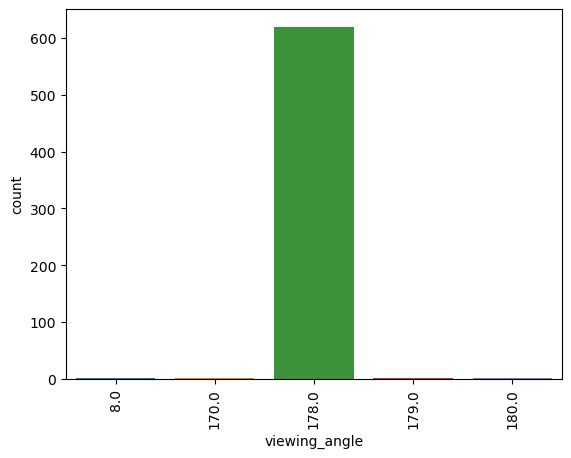

In [147]:
sns.countplot(data['viewing_angle'])
plt.xticks(rotation='vertical')
plt.show()

In [149]:
data['viewing_angle'].value_counts()/len(data)

178.0    0.689655
179.0    0.002225
180.0    0.001112
8.0      0.001112
170.0    0.001112
Name: viewing_angle, dtype: float64

- 30.4% null values 
- among non- null values, almost all the TVs ahve a viewing angle of 178 degrees

# num_hdmi_ports

In [150]:
data['num_hdmi_ports'].value_counts()

3.0    448
2.0    242
4.0    176
1.0     20
Name: num_hdmi_ports, dtype: int64

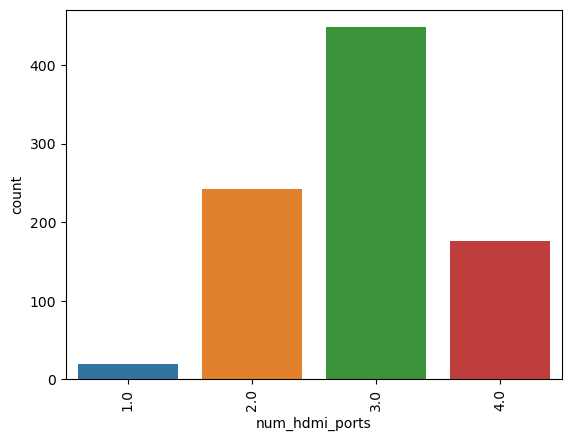

In [152]:
sns.countplot(data['num_hdmi_ports'])
plt.xticks(rotation='vertical')
plt.show()

In [153]:
data['num_hdmi_ports'].isna().mean() * 100

1.4460511679644048

- 1.4% missing values
- majority of the TVs have 3 HDMI ports

# num_usb_ports

In [154]:
data['num_usb_ports'].isna().mean() * 100

1.4460511679644048

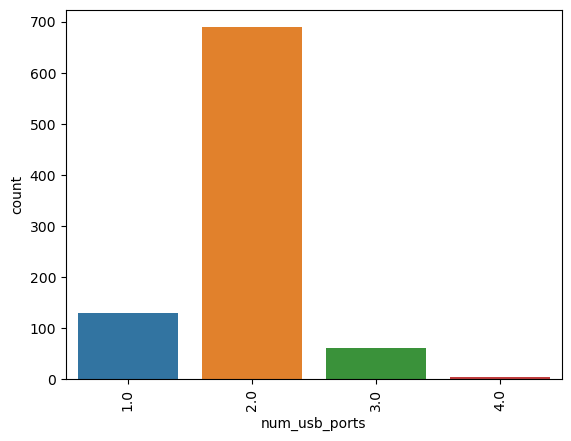

In [155]:
sns.countplot(data['num_usb_ports'])
plt.xticks(rotation='vertical')
plt.show()

- 1.4% missing values
- majority of the TVs have 2 USB ports

# rating

In [157]:
data['rating'].isna().mean() * 100

0.0

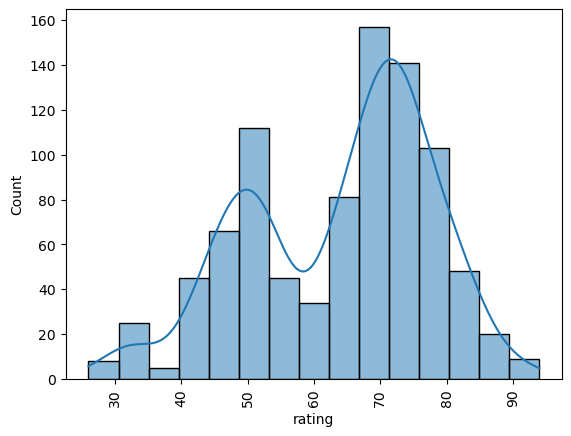

In [162]:
# plt.figure(figsize=(15,7))
sns.histplot(data['rating'], kde=True)
plt.xticks(rotation='vertical')
plt.show()

In [163]:
data['rating'].describe()

count    899.000000
mean      63.921023
std       13.869957
min       26.000000
25%       52.000000
50%       68.000000
75%       74.000000
max       94.000000
Name: rating, dtype: float64

- no null values
- bimodal distribution
- mean rating: 63.9
- mean and median rating are close which means that the data is not very skewed -> KDE shows that
- highest rating is 94.